Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


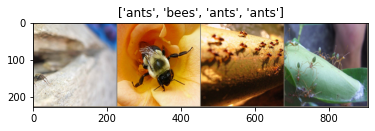

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.6240 Acc: 0.6721
val Loss: 0.4091 Acc: 0.8235

Epoch 1/24
----------
train Loss: 0.4469 Acc: 0.8033
val Loss: 0.2561 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.5038 Acc: 0.8115
val Loss: 0.3348 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.6218 Acc: 0.7664
val Loss: 0.6551 Acc: 0.7843

Epoch 4/24
----------
train Loss: 0.4933 Acc: 0.8156
val Loss: 0.7052 Acc: 0.7908

Epoch 5/24
----------
train Loss: 0.4562 Acc: 0.8197
val Loss: 0.3360 Acc: 0.8954

Epoch 6/24
----------
train Loss: 0.4429 Acc: 0.8279
val Loss: 0.3419 Acc: 0.8758

Epoch 7/24
----------
train Loss: 0.2464 Acc: 0.9016
val Loss: 0.2807 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.3644 Acc: 0.8730
val Loss: 0.2621 Acc: 0.9085

Epoch 9/24
----------
train Loss: 0.3653 Acc: 0.8238
val Loss: 0.3109 Acc: 0.8889

Epoch 10/24
----------
train Loss: 0.4100 Acc: 0.8320
val Loss: 0.2859 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.2897 Acc: 0.8648
val Loss: 0.2925 Acc: 0.8824

Epoch 12/24
----------
t

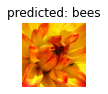

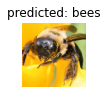

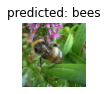

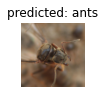

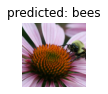

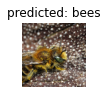

Epoch 0/24
----------
train Loss: 0.5413 Acc: 0.7131
val Loss: 0.2258 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.3794 Acc: 0.8484
val Loss: 0.2226 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.4749 Acc: 0.7828
val Loss: 0.1881 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.5143 Acc: 0.7664
val Loss: 0.1798 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.3548 Acc: 0.8443
val Loss: 0.1941 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.4179 Acc: 0.8320
val Loss: 0.1825 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.3701 Acc: 0.8238
val Loss: 0.1419 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.2432 Acc: 0.9057
val Loss: 0.1525 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.3613 Acc: 0.8484
val Loss: 0.1469 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3004 Acc: 0.8648
val Loss: 0.1491 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3822 Acc: 0.8238
val Loss: 0.1434 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.2665 Acc: 0.9057
val Loss: 0.1404 Acc: 0.9477

Ep

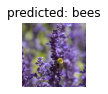

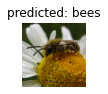

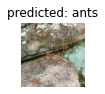

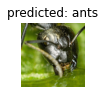

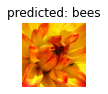

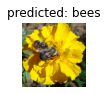

In [4]:
%matplotlib inline
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
plt.ion()

from google.colab import drive
drive.mount('/content/drive')

data_transforms = {
  'train': transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ]),
  'val': transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ]),
}

data_dir = '/content/drive/My Drive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def imshow(inp, title=None):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
  since = time.time()
  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    for phase in ['train', 'val']:
      if phase == 'train':
        scheduler.step()
        model.train()
      else:
        model.eval()
      running_loss = 0.0
      running_corrects = 0
      for inputs, labels in dataloaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          if phase == 'train':
            loss.backward()
            optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double() / dataset_sizes[phase]
      print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    print()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc))
  model.load_state_dict(best_model_wts)
  return model

def visualize_model(model, num_images=6):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['val']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.size()[0]):
        images_so_far += 1
        ax = plt.subplot(num_images//2, 2, images_so_far)
        ax.axis('off')
        ax.set_title('predicted: {}'.format(class_names[preds[j]]))
        imshow(inputs.cpu().data[j])

        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode=was_training)

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
visualize_model(model_ft)

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
  param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)
visualize_model(model_conv)

plt.ioff()
plt.show()